# Instalo dependencias necesarias...

INvestigar y hacer una conclusion con tf-idf

In [4]:
%pip install scikit-learn


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\usuario\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


In [5]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


## Preparo el ambiente

In [6]:
import os
import numpy as np
import nltk
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# Importo las librerías necesarias para procesar los textos
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re

SPECIAL_CHARACTERS = []

SPECIAL_CHARACTERS.extend(map(chr, range(0, 32)))
SPECIAL_CHARACTERS.extend(map(chr, range(33, 48)))
SPECIAL_CHARACTERS.extend(map(chr, range(58, 65)))
SPECIAL_CHARACTERS.extend(map(chr, range(91, 97)))
SPECIAL_CHARACTERS.extend(map(chr, range(123, 225)))
SPECIAL_CHARACTERS.extend(map(chr, range(226, 233)))
SPECIAL_CHARACTERS.extend(map(chr, range(234, 237)))
SPECIAL_CHARACTERS.extend(map(chr, range(238, 241)))
SPECIAL_CHARACTERS.extend(map(chr, range(242, 243)))
SPECIAL_CHARACTERS.extend(map(chr, range(244, 250)))
SPECIAL_CHARACTERS.extend(map(chr, range(251, 880)))

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# The screen is cleaned
class ClearScreen():
    
    def __init__(self):
        self.clear = os.system('cls' if os.name=='nt' else 'clear')

## Obtenemos el listado de archivos

In [8]:
# Obtener la lista de archivos en el directorio
def getFiles(path, extension="*.txt"): 
    
    # Construir el patrón de búsqueda
    patron = os.path.join(path, extension)
    
    # Obtener la lista de archivos que coinciden con el patrón
    archivos = glob.glob(patron)
    
    return archivos

In [9]:
def countFiles(path, extension="*.txt"): 
    
    # Construir el patrón de búsqueda
    patron = os.path.join(path, extension)
    
    # Obtener la lista de archivos que coinciden con el patrón
    archivos = glob.glob(patron)
    
    return len(archivos)   

### Definimos la variable path con la ruta de la carpeta donde se encuentran los archivos

In [10]:
path = os.path.join(os.getcwd(), "corpus")

In [13]:
def getDatos(files, iteracion):
    datos = []
    
    for i, value in enumerate(files):      
              
        print("File: " + str(i))
        
        file = open(value, encoding= "utf-8-sig")
        text = file.read()
        file.close()
        
        filename = os.path.basename(value)
        
        datos.append([i, filename, text])
         
        if i == iteracion - 1:
            break 
    return datos

In [14]:
def saveCSV(df, filename):
    if os.path.exists(filename):
        os.remove(filename)
    
    df.to_csv(filename, index=False, encoding='utf-8-sig')

In [15]:
class CleanText():
    
    def __init__(self, text, language="english"):
        
        self.text = text
        self.language = language
        self.clean_text = None
        self.remove_spec_text = None
        self.remove_stop_text = None
        self.lemma_text = None
    
    def removePatterns(self):
        
        replacements = (
            ("á", "a"),
            ("é", "e"),
            ("í", "i"),
            ("ó", "o"),
            ("ú", "u"),
        )
        self.text = str(self.text)
        self.clean_text = self.text.lower()
        self.clean_text = re.sub(r"\s{2,}", " ", self.clean_text)
        self.clean_text = re.sub(r"\n", " ", self.clean_text)
        self.clean_text = re.sub(r"\d+", " ", self.clean_text)
        self.clean_text = re.sub(r"^\s+", " ", self.clean_text)
        self.clean_text = re.sub(r"\s+", " ", self.clean_text)
        
        for a, b in replacements:
            self.clean_text = self.clean_text.replace(a, b).replace(a.upper(), b.upper())
        
        return self.clean_text
    
    def removeSpecChars(self):
        
        remove_patterns = self.removePatterns()
        tokens = list(word_tokenize(remove_patterns))
        clean_tokens = tokens.copy()
        for i in range(len(clean_tokens)):
            for special_character in SPECIAL_CHARACTERS:
                clean_tokens[i] = clean_tokens[i].replace(special_character, '')            
            
        clean_tokens = [token for token in clean_tokens if token]        
        self.remove_spec_text = " ".join(clean_tokens)        
        
        return self.remove_spec_text       
    
    def RemoveStopText(self):
        
        st = ["'", "!", '"', "#", "$", "%", "&", "*", "+", "-", ".", "/", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~']
        
        sw = stopwords.words(self.language) + st
        text = list(word_tokenize(self.removeSpecChars()))
        text = [w for w in text if not w in sw]
        self.remove_stop_text = " ".join(text)
        
        return self.remove_stop_text
    
    def lemmatizeText(self):
        
        lemmatizer = WordNetLemmatizer()
        list_lemma_text = []
        tokens = word_tokenize(self.RemoveStopText())
        
        for token in tokens:
            lemmetized_word = lemmatizer.lemmatize(token)
            list_lemma_text.append(lemmetized_word)
        
        self.lemma_text = " ".join(list_lemma_text)
        
        return self.lemma_text

In [ ]:
# Imprimir el número de archivos encontrados
print(f"El número de archivos *.txt en el directorio {path} es: {countFiles(path)}")

band = False
while not band:
    # Define the size of the list    
    try:
        limite = countFiles(path) - 1
        iteracion = int(input(f"Elija un numero entre 0 y {limite}: "))
        if iteracion > 0 and iteracion <= countFiles(path):
            print(f"Se recorrerá hasta la iteración {iteracion}")
            band = True
        else:
            print(f"Usted debe ingresar un valor entre 0 y {limite}\n")
            input("Presione alguna tecla para seguir...")
            ClearScreen().clear
            
    except Exception as e:
        print(str(e)+"\n")
        print("Usted debe ingresar un valor númerico \n")
        input("Presione alguna tecla para seguir...")
        ClearScreen().clear
        
        
datos = getDatos(getFiles(path), iteracion)

df = pd.DataFrame(datos, columns=["index", "filename", "text"])

saveCSV(df, "intrinsic.csv")


El número de archivos *.txt en el directorio C:\Users\usuario\Documents\DIPLODATOS\deteccion_plagio\M11-DeteccionPlagio-GrupoB\corpus es: 0
Elija un numero entre 0 y -1: 0
Usted debe ingresar un valor entre 0 y -1



### Trabajamos con una copia de df para no modificar el original

In [12]:
new_df = df.copy()

### Agregamos una columna con el contenido de los archivos 'limpios'

In [13]:
new_df["clean_text"] = df["text"].map(lambda x: CleanText(str(x)).lemmatizeText())

# Palabras más frecuentes del texto 'sucio'

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer()
sum_words_without_clean = cv.fit_transform(new_df['text'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_without_clean = [(word, sum_words_without_clean[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_without_clean = sorted(words_freq_without_clean, key = lambda x: x[1], reverse=True)[:25]

In [32]:
words_freq_without_clean

[('the', 3625),
 ('of', 2354),
 ('to', 1683),
 ('and', 1680),
 ('in', 1145),
 ('her', 654),
 ('that', 540),
 ('is', 518),
 ('was', 486),
 ('as', 483),
 ('by', 437),
 ('it', 431),
 ('she', 394),
 ('be', 390),
 ('their', 377),
 ('with', 375),
 ('for', 370),
 ('his', 342),
 ('not', 335),
 ('or', 328),
 ('they', 319),
 ('but', 277),
 ('were', 270),
 ('which', 268),
 ('women', 261)]

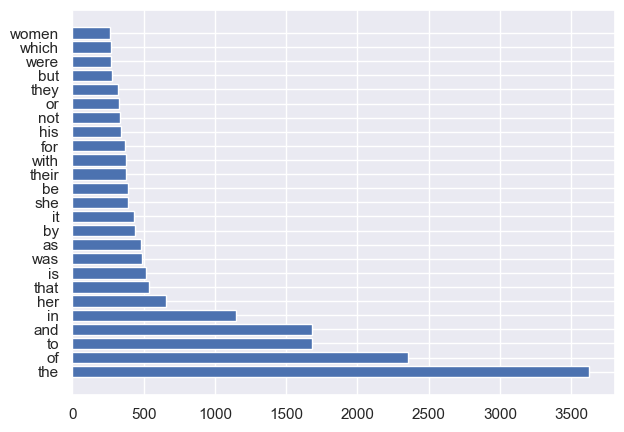

In [33]:
sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_without_clean))

plt.show()

# Palabras más frecuentes del texto limpio

In [34]:
sum_words_with_clean = cv.fit_transform(new_df['clean_text'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_with_clean = [(word, sum_words_with_clean[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_with_clean = sorted(words_freq_with_clean, key = lambda x: x[1], reverse=True)[:25]

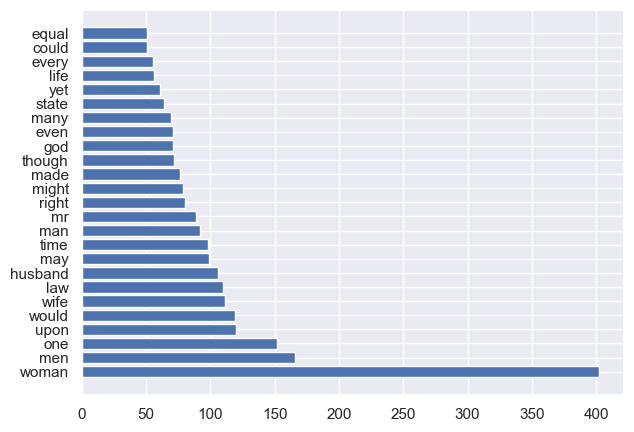

In [35]:
sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_with_clean))

plt.show()

# Nube de Palabras

Se separan las palabras según etiqueta (negative, neutral, positive)

Negative Class

In [36]:
stopwords = set(STOPWORDS)

negative_df = new_df[new_df["target"] == -1]

negative_text = " ".join(review for review in negative_df.clean_text.astype(str))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(negative_text)

NameError: name 'STOPWORDS' is not defined

In [ ]:
plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

#### Aplicamos TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
#Importa las clases necesarias de sklearn:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Crea una instancia de TfidfVectorizer con los parámetros deseados:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [ ]:
#Aplica fit_transform a los datos de new_df['clean_text']:
tfidf = tfidf_vectorizer.fit_transform(new_df['clean_text'])